In [2]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
pwd

'/Users/tarapongsrisongkram/OneDrive - Khon Kaen University (1)/Amylase inhibitor/Python'

In [4]:
df = pd.read_csv('df_clean_class.csv', index_col='Name_Short')
df.head(2)

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class
Name_Short,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both


In [5]:
df['Bioactivity_class_number'] = df['Bioactivity_class'].map({'active_both': 3, 'active_glucosidase': 2, 'active_amylase': 1, 'inactive': 0})
df.head(2)

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class,Bioactivity_class_number
Name_Short,,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both,3
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both,3


In [6]:
df.to_csv('df_clean_class_number.csv')

In [7]:
indices = df.index

# baseline RF

In [8]:
plant_df = df.copy()
fingerprint_to_model = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]
label_to_model = plant_df.Bioactivity_class.tolist()

In [9]:
fingerprint_to_model.head()

,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,
G_cowa,0,0,0,0,0,2,2,2
P_debilis,3,0,0,5,3,0,0,0
P_evecta_leaf,0,0,0,3,0,3,2,0
P_evecta_Rhizome,3,0,0,5,3,0,0,5
E_cuneatum,3,0,0,2,0,3,3,0


In [10]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(fingerprint_to_model, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 24
Test data size: 7


In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(train_x, train_y)


RandomForestClassifier(random_state=42)

CV_score = [0.33333333 0.33333333 0.33333333 0.         0.5        0.5
 1.         0.5        1.         0.5       ]
CV_mean = 0.5
CV_sd = 0.2886751345948129
accuracy score = 0.5714285714285714


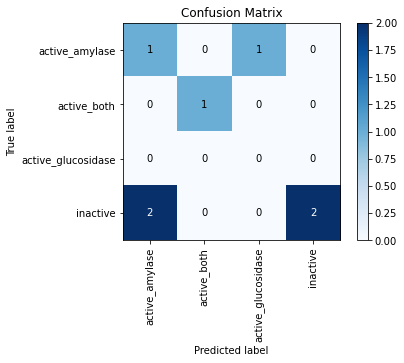

In [13]:
from sklearn.metrics import accuracy_score
scores=cross_val_score(model_RF, train_x, train_y, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(f'CV_score = {scores}')
print(f'CV_mean = {avg_score}')
print(f'CV_sd = {sd_score}')
y_pred = model_RF.predict(test_x)
y_pred
accuracy_score = accuracy_score(test_y, y_pred, normalize=True)
print(f'accuracy score = {accuracy_score}')
skplot.metrics.plot_confusion_matrix(test_y, y_pred)
plt.xticks(rotation=90)
plt.show()

In [14]:
import matplotlib.pyplot as plt
import scikitplot as skplt

# This is a Keras classifier. We'll generate probabilities on the test set.

probas = model_RF.predict_proba(test_x)
probas

array([[0.49, 0.14, 0.  , 0.37],
       [0.33, 0.05, 0.08, 0.54],
       [0.  , 0.27, 0.25, 0.48],
       [0.07, 0.69, 0.02, 0.22],
       [0.01, 0.05, 0.82, 0.12],
       [0.47, 0.05, 0.07, 0.41],
       [0.74, 0.  , 0.  , 0.26]])

# PCA

In [15]:
features = ['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']
x = df.loc[:, features].values
y = df.loc[:,['Bioactivity_class']].values
X = pd.DataFrame(data = x, columns = features, index=indices)
X

,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones
Name_Short,,,,,,,,
G_cowa,0,0,0,0,0,2,2,2
P_debilis,3,0,0,5,3,0,0,0
P_evecta_leaf,0,0,0,3,0,3,2,0
P_evecta_Rhizome,3,0,0,5,3,0,0,5
E_cuneatum,3,0,0,2,0,3,3,0
P_anamense,3,0,0,3,3,3,2,0
A_marginata,0,0,0,2,0,3,3,0
E_cherrevensis,5,0,1,2,0,3,0,0
F_indica,3,1,0,3,3,2,2,0


In [16]:
pca = PCA(.95)
pca.fit(X)
principalComponents = pca.fit_transform(X) #fittransform for RFC

In [17]:
print('Principal components count: ', pca.n_components_)
print('Principal explained variance: ',pca.explained_variance_ratio_)

Principal components count:  6
Principal explained variance:  [0.31856466 0.24071605 0.19194758 0.11693189 0.08003695 0.04767158]


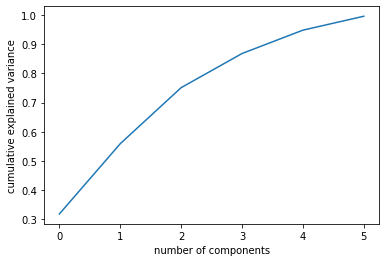

In [18]:
#Explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
df_re = pd.DataFrame(principalComponents, index = indices, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_re

,PC1,PC2,PC3,PC4,PC5,PC6
Name_Short,,,,,,
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,0.586112
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,0.712830
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,-1.181858
P_evecta_Rhizome,5.553863,-2.494154,1.899712,-0.839114,0.751199,-0.080271
E_cuneatum,0.230586,2.275222,-0.272833,0.988605,0.264548,-1.350849
P_anamense,1.791691,1.447887,-1.589100,-0.888612,1.086445,0.040024
A_marginata,-1.510425,0.007190,-0.913622,1.359107,0.715027,-1.118767
E_cherrevensis,1.295097,3.204121,1.245042,-0.889576,-1.566359,0.131278
F_indica,2.321658,1.148881,-1.691600,-0.244665,0.732347,0.324237


In [20]:
df_re_label = pd.concat([df_re, df['Bioactivity_class']], axis=1)
df_re_label

,PC1,PC2,PC3,PC4,PC5,PC6,Bioactivity_class
Name_Short,,,,,,,
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,0.586112,active_both
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,0.712830,active_both
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,-1.181858,active_both
P_evecta_Rhizome,5.553863,-2.494154,1.899712,-0.839114,0.751199,-0.080271,active_glucosidase
E_cuneatum,0.230586,2.275222,-0.272833,0.988605,0.264548,-1.350849,active_amylase
P_anamense,1.791691,1.447887,-1.589100,-0.888612,1.086445,0.040024,active_glucosidase
A_marginata,-1.510425,0.007190,-0.913622,1.359107,0.715027,-1.118767,inactive
E_cherrevensis,1.295097,3.204121,1.245042,-0.889576,-1.566359,0.131278,active_amylase
F_indica,2.321658,1.148881,-1.691600,-0.244665,0.732347,0.324237,active_amylase


In [21]:
Bioactivity_class = df_re_label['Bioactivity_class']

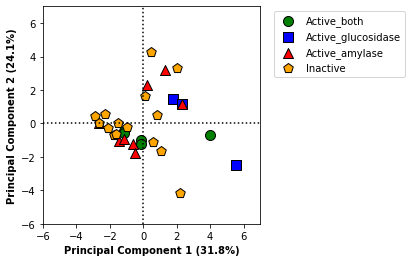

In [24]:
#labels = {'active_both': 'green', 'active_glucosidase': 'blue', 'active_amylase': 'red', 'inactive': 'orange'}
#label_color = [labels[l] for l in df['Bioactivity_class']]
#legends = ['active_both', 'active_glucosidase', 'active_amylase', 'inactive']

label1 = df_re_label[Bioactivity_class == 'active_both']
label2 = df_re_label[Bioactivity_class == 'active_glucosidase']
label3 = df_re_label[Bioactivity_class == 'active_amylase']
label4 = df_re_label[Bioactivity_class == 'inactive']
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
#plt.scatter(principalComponents[:, 0], principalComponents[:, 1], color=label_color,s=70, alpha=0.8, edgecolors='black')
plt.scatter(label1['PC1'] , label1['PC2'] , color = 'green', label='Active_both',s=100, alpha=1, edgecolor='black', marker='o')
plt.scatter(label2['PC1'] , label2['PC2'] , color = 'blue', label='Active_glucosidase',s=100, alpha=1, edgecolor='black', marker='s')
plt.scatter(label3['PC1'] , label3['PC2'] , color = 'red', label='Active_amylase',s=100, alpha=1, edgecolor='black', marker='^')
plt.scatter(label4['PC1'] , label4['PC2'] , color = 'orange', label='Inactive',s=100, alpha=1, edgecolor='black', marker='p')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlim(-6,7)
plt.ylim(-6,7)
plt.xlabel('Principal Component 1 (31.8%)', weight='bold')
plt.ylabel('Principal Component 2 (24.1%)', weight='bold')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
ax.set_aspect('equal', adjustable='box')
plt.savefig('PCA1-2_with_label.pdf', dpi=500, bbox_inches='tight')
plt.show()

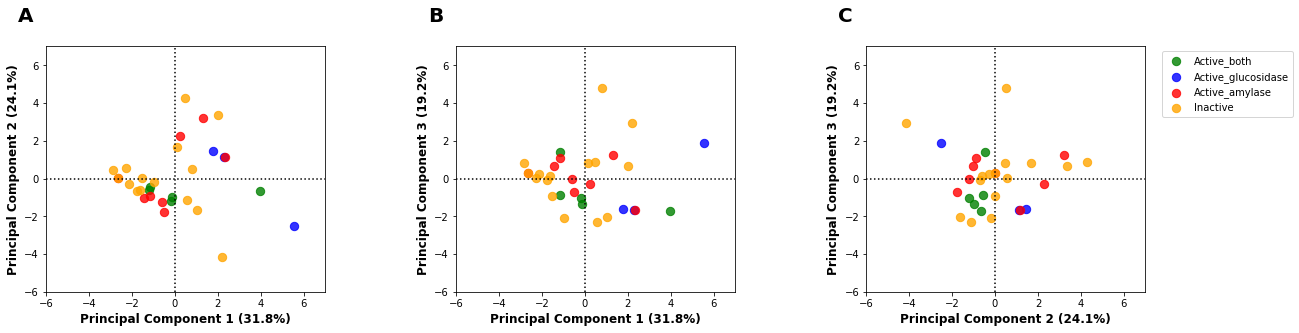

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
#fig.suptitle('3 Principal components explained 75.1% variance', weight='bold', fontsize=15)
fig.tight_layout(w_pad=10)
texts = ['A', 'B', 'C']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')
    
ax[0].axvline(0, c='black', ls=':')
ax[0].axhline(0, c='black', ls=':')
ax[0].set_xlim(-6,7)
ax[0].set_ylim(-6,7)
ax[0].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=12)
ax[0].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=12)
ax[0].scatter(label1['PC1'] , label1['PC2'] , color = 'green', label='Active_both',s=70, alpha=0.8)
ax[0].scatter(label2['PC1'] , label2['PC2'] , color = 'blue', label='Active_glucosidase',s=70, alpha=0.8)
ax[0].scatter(label3['PC1'] , label3['PC2'] , color = 'red', label='Active_amylase',s=70, alpha=0.8)
ax[0].scatter(label4['PC1'] , label4['PC2'] , color = 'orange', label='Inactive',s=70, alpha=0.8)

ax[1].axvline(0, c='black', ls=':')
ax[1].axhline(0, c='black', ls=':')
ax[1].set_xlim(-6,7)
ax[1].set_ylim(-6,7)
ax[1].set_xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=12)
ax[1].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=12)
ax[1].scatter(label1['PC1'] , label1['PC3'] , color = 'green', label='Active_both',s=70, alpha=0.8)
ax[1].scatter(label2['PC1'] , label2['PC3'] , color = 'blue', label='Active_glucosidase',s=70, alpha=0.8)
ax[1].scatter(label3['PC1'] , label3['PC3'] , color = 'red', label='Active_amylase',s=70, alpha=0.8)
ax[1].scatter(label4['PC1'] , label4['PC3'] , color = 'orange', label='Inactive',s=70, alpha=0.8)

ax[2].axvline(0, c='black', ls=':')
ax[2].axhline(0, c='black', ls=':')
ax[2].set_xlim(-6,7)
ax[2].set_ylim(-6,7)
ax[2].set_xlabel('Principal Component 2 (24.1%)', weight='bold', fontsize=12)
ax[2].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=12)
ax[2].scatter(label1['PC2'] , label1['PC3'] , color = 'green', label='Active_both',s=70, alpha=0.8)
ax[2].scatter(label2['PC2'] , label2['PC3'] , color = 'blue', label='Active_glucosidase',s=70, alpha=0.8)
ax[2].scatter(label3['PC2'] , label3['PC3'] , color = 'red', label='Active_amylase',s=70, alpha=0.8)
ax[2].scatter(label4['PC2'] , label4['PC3'] , color = 'orange', label='Inactive',s=70, alpha=0.8)
ax[2].legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.savefig('PCA1-3_with_label.pdf', dpi=500, bbox_inches='tight')
plt.show()

In [26]:
from pca import pca
model = pca(n_components=0.95)

# Reduce the data towards 3 PCs
model = pca(n_components=6)

# Fit transform
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [27]:
results

{'loadings':      Alkaloids  Antaquinones  Carotenoids  flavonoids  Reducing_sugars  \
 PC1   0.580337      0.019162     0.010689    0.365101         0.410541   
 PC2   0.756010      0.012549     0.034999   -0.384646        -0.078883   
 PC3   0.213596     -0.023172     0.017055   -0.297454        -0.458896   
 PC4  -0.123501     -0.005502    -0.020003   -0.425605        -0.304851   
 PC5  -0.150160      0.024059    -0.051457   -0.285448         0.533463   
 PC6  -0.077361      0.017883     0.007241   -0.606294         0.484655   
 
      Saponins   Tannins  Xanthones  
 PC1 -0.510805  0.035617   0.314158  
 PC2  0.311556  0.206040  -0.365200  
 PC3  0.079328 -0.357876   0.721191  
 PC4 -0.649448  0.537059   0.005296  
 PC5  0.378156  0.493043   0.471241  
 PC6 -0.266329 -0.543203  -0.158620  ,
 'PC':                        PC1       PC2       PC3       PC4       PC5       PC6
 G_cowa           -1.137123 -0.471515  1.402216  2.333299  1.357207  0.586112
 P_debilis         3.983072 -0.6

In [28]:
df_pca_loading = pd.DataFrame.from_dict(results["loadings"]).T
df_pca_loading.to_csv('df_pca_loading.csv')
df_pca_loading

,PC1,PC2,PC3,PC4,PC5,PC6
Alkaloids,0.580337,0.756010,0.213596,-0.123501,-0.150160,-0.077361
Antaquinones,0.019162,0.012549,-0.023172,-0.005502,0.024059,0.017883
Carotenoids,0.010689,0.034999,0.017055,-0.020003,-0.051457,0.007241
flavonoids,0.365101,-0.384646,-0.297454,-0.425605,-0.285448,-0.606294
Reducing_sugars,0.410541,-0.078883,-0.458896,-0.304851,0.533463,0.484655
Saponins,-0.510805,0.311556,0.079328,-0.649448,0.378156,-0.266329
Tannins,0.035617,0.206040,-0.357876,0.537059,0.493043,-0.543203
Xanthones,0.314158,-0.365200,0.721191,0.005296,0.471241,-0.158620


In [29]:
df_pca_loading.index

Index(['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids',
       'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones'],
      dtype='object')

In [30]:
loading1 = df_pca_loading.loc[df_pca_loading.index == 'Alkaloids']
loading2 = df_pca_loading.loc[df_pca_loading.index == 'Antaquinones']
loading3 = df_pca_loading.loc[df_pca_loading.index == 'Carotenoids']
loading4 = df_pca_loading.loc[df_pca_loading.index == 'flavonoids']
loading5 = df_pca_loading.loc[df_pca_loading.index == 'Reducing_sugars']
loading6 = df_pca_loading.loc[df_pca_loading.index == 'Saponins']
loading7 = df_pca_loading.loc[df_pca_loading.index == 'Tannins']
loading8 = df_pca_loading.loc[df_pca_loading.index == 'Xanthones']

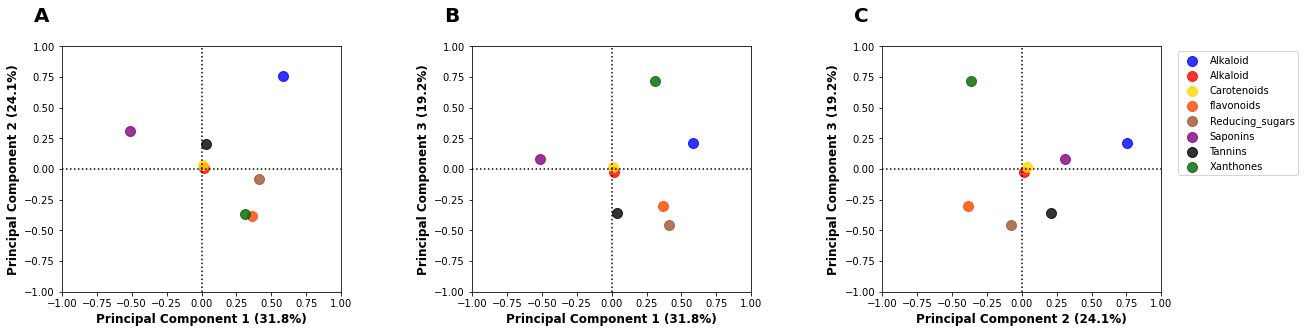

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
fig.tight_layout(w_pad=10)
texts = ['A', 'B', 'C']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')
ax[0].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=12)
ax[0].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=12)
ax[1].set_xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=12)
ax[1].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=12)
ax[2].set_xlabel('Principal Component 2 (24.1%)', weight='bold', fontsize=12)
ax[2].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=12)
ax[0].axvline(0, c='black', ls=':')
ax[0].axhline(0, c='black', ls=':')
ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[1].axvline(0, c='black', ls=':')
ax[1].axhline(0, c='black', ls=':')
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)
ax[2].axvline(0, c='black', ls=':')
ax[2].axhline(0, c='black', ls=':')
ax[2].set_xlim(-1,1)
ax[2].set_ylim(-1,1)


ax[0].scatter(loading1['PC1'] , loading1['PC2'] , color = 'blue', label='Alkaloid',s=100, alpha=0.8)
ax[0].scatter(loading2['PC1'] , loading2['PC2'] , color = 'red', label='Alkaloid',s=100, alpha=0.8)
ax[0].scatter(loading3['PC1'] , loading3['PC2'] , color = 'gold', label='Carotenoids',s=100, alpha=0.8)
ax[0].scatter(loading4['PC1'] , loading4['PC2'] , color = 'orangered', label='flavonoids',s=100, alpha=0.8)
ax[0].scatter(loading5['PC1'] , loading5['PC2'] , color = 'sienna', label='Reducing_sugars',s=100, alpha=0.8)
ax[0].scatter(loading6['PC1'] , loading6['PC2'] , color = 'purple', label='Saponins',s=100, alpha=0.8)
ax[0].scatter(loading7['PC1'] , loading7['PC2'] , color = 'black', label='Tannins',s=100, alpha=0.8)
ax[0].scatter(loading8['PC1'] , loading8['PC2'] , color = 'darkgreen', label='Xanthones',s=100, alpha=0.8)

ax[1].scatter(loading1['PC1'] , loading1['PC3'] , color = 'blue', label='Alkaloid',s=100, alpha=0.8)
ax[1].scatter(loading2['PC1'] , loading2['PC3'] , color = 'red', label='Alkaloid',s=100, alpha=0.8)
ax[1].scatter(loading3['PC1'] , loading3['PC3'] , color = 'gold', label='Carotenoids',s=100, alpha=0.8)
ax[1].scatter(loading4['PC1'] , loading4['PC3'] , color = 'orangered', label='flavonoids',s=100, alpha=0.8)
ax[1].scatter(loading5['PC1'] , loading5['PC3'] , color = 'sienna', label='Reducing_sugars',s=100, alpha=0.8)
ax[1].scatter(loading6['PC1'] , loading6['PC3'] , color = 'purple', label='Saponins',s=100, alpha=0.8)
ax[1].scatter(loading7['PC1'] , loading7['PC3'] , color = 'black', label='Tannins',s=100, alpha=0.8)
ax[1].scatter(loading8['PC1'] , loading8['PC3'] , color = 'darkgreen', label='Xanthones',s=100, alpha=0.8)

ax[2].scatter(loading1['PC2'] , loading1['PC3'] , color = 'blue', label='Alkaloid',s=100, alpha=0.8)
ax[2].scatter(loading2['PC2'] , loading2['PC3'] , color = 'red', label='Alkaloid',s=100, alpha=0.8)
ax[2].scatter(loading3['PC2'] , loading3['PC3'] , color = 'gold', label='Carotenoids',s=100, alpha=0.8)
ax[2].scatter(loading4['PC2'] , loading4['PC3'] , color = 'orangered', label='flavonoids',s=100, alpha=0.8)
ax[2].scatter(loading5['PC2'] , loading5['PC3'] , color = 'sienna', label='Reducing_sugars',s=100, alpha=0.8)
ax[2].scatter(loading6['PC2'] , loading6['PC3'] , color = 'purple', label='Saponins',s=100, alpha=0.8)
ax[2].scatter(loading7['PC2'] , loading7['PC3'] , color = 'black', label='Tannins',s=100, alpha=0.8)
ax[2].scatter(loading8['PC2'] , loading8['PC3'] , color = 'darkgreen', label='Xanthones',s=100, alpha=0.8)

ax[2].legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.savefig('Loading1-3_with_label.pdf', dpi=500, bbox_inches='tight')
plt.show()

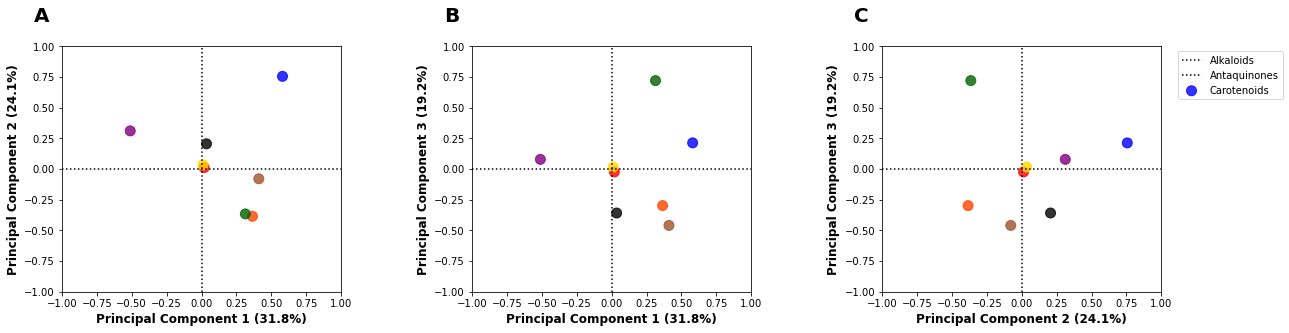

In [32]:
loading_color = {'Alkaloids': 'blue', 'Antaquinones': 'red', 'Carotenoids': 'gold', 'flavonoids': 'orangered', 'Reducing_sugars': 'sienna', 'Saponins': 'purple', 'Tannins': 'black', 'Xanthones': 'darkgreen'}
loading_label = [loading_color[i] for i in df_pca_loading.index]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
#fig.suptitle('3 Principal components explained 75.1% variance', weight='bold', fontsize=15)
fig.tight_layout(w_pad=10)
texts = ['A', 'B', 'C']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')
ax[0].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=12)
ax[0].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=12)
ax[1].set_xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=12)
ax[1].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=12)
ax[2].set_xlabel('Principal Component 2 (24.1%)', weight='bold', fontsize=12)
ax[2].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=12)
ax[0].axvline(0, c='black', ls=':')
ax[0].axhline(0, c='black', ls=':')
ax[0].set_xlim(-1,1)
ax[0].set_ylim(-1,1)
ax[0].scatter(df_pca_loading['PC1'] , df_pca_loading['PC2'] , color = loading_label, label=loading_label,s=100, alpha=0.8)

ax[1].axvline(0, c='black', ls=':')
ax[1].axhline(0, c='black', ls=':')
ax[1].set_xlim(-1,1)
ax[1].set_ylim(-1,1)
ax[1].scatter(df_pca_loading['PC1'] , df_pca_loading['PC3'] , color = loading_label, label=loading_label,s=100, alpha=0.8)


ax[2].axvline(0, c='black', ls=':')
ax[2].axhline(0, c='black', ls=':')
ax[2].set_xlim(-1,1)
ax[2].set_ylim(-1,1)
ax[2].scatter(df_pca_loading['PC2'] , df_pca_loading['PC3'] , color = loading_label, label=loading_label,s=100, alpha=0.8)
#markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in loading_color]
ax[2].legend(loading_color.keys(), bbox_to_anchor=(1.04,1), loc='upper left')


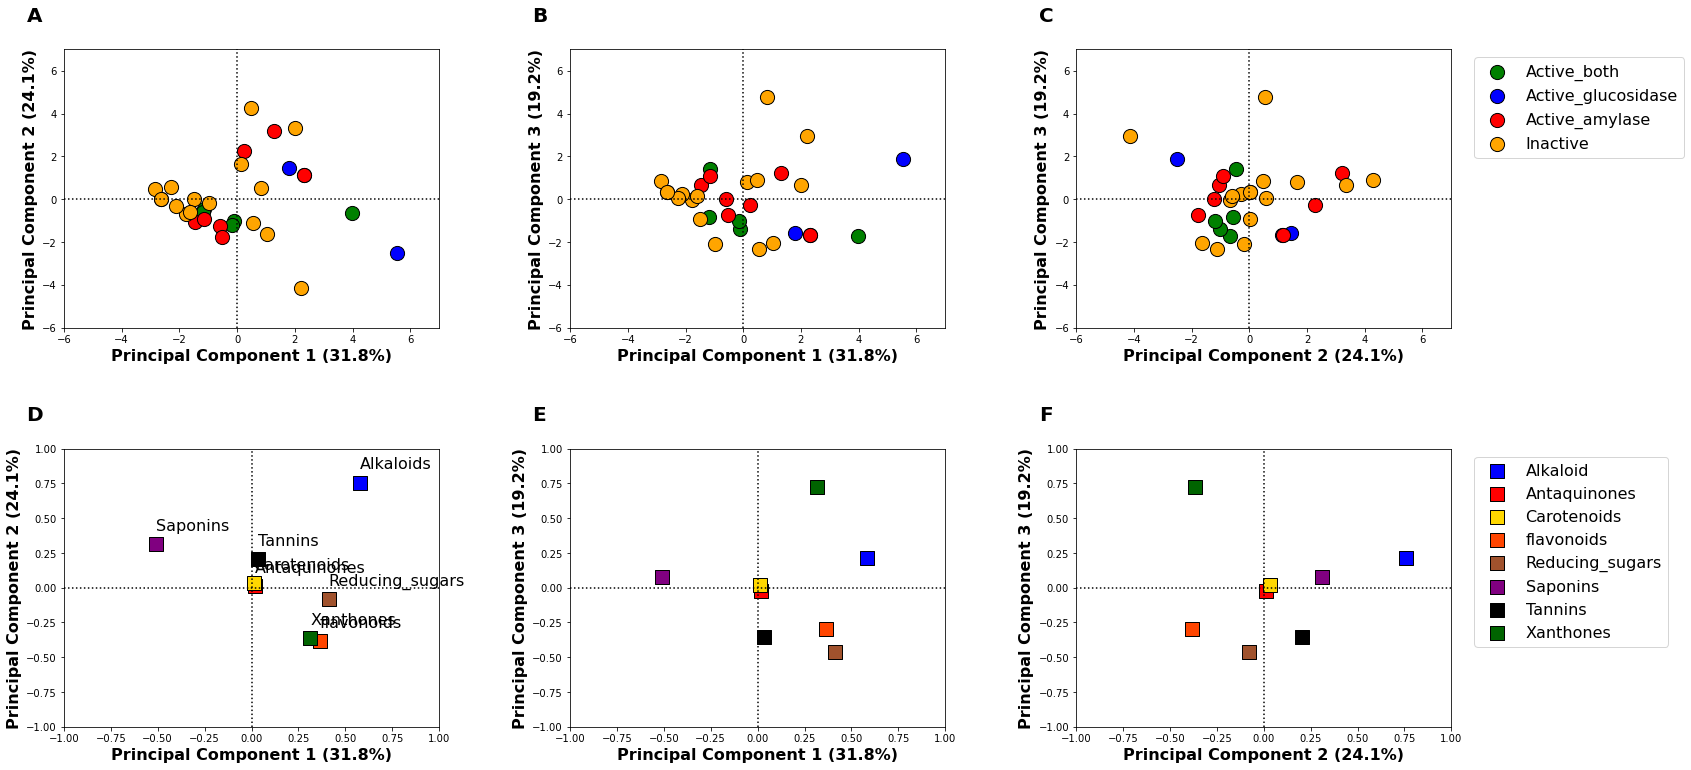

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
fig.tight_layout(w_pad=10, h_pad=10)
texts = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')
    

ax[0,0].axvline(0, c='black', ls=':')
ax[0,0].axhline(0, c='black', ls=':')
ax[0,0].set_xlim(-6,7)
ax[0,0].set_ylim(-6,7)
ax[0,0].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=16)
ax[0,0].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[0,0].scatter(label1['PC1'] , label1['PC2'] , color = 'green', label='Active_both',s=200, alpha=1, edgecolor='black')
ax[0,0].scatter(label2['PC1'] , label2['PC2'] , color = 'blue', label='Active_glucosidase',s=200, alpha=1, edgecolor='black')
ax[0,0].scatter(label3['PC1'] , label3['PC2'] , color = 'red', label='Active_amylase',s=200, alpha=1, edgecolor='black')
ax[0,0].scatter(label4['PC1'] , label4['PC2'] , color = 'orange', label='Inactive',s=200, alpha=1, edgecolor='black')

ax[0,1].axvline(0, c='black', ls=':')
ax[0,1].axhline(0, c='black', ls=':')
ax[0,1].set_xlim(-6,7)
ax[0,1].set_ylim(-6,7)
ax[0,1].set_xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=16)
ax[0,1].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=16)
ax[0,1].scatter(label1['PC1'] , label1['PC3'] , color = 'green', label='Active_both',s=200, alpha=1, edgecolor='black')
ax[0,1].scatter(label2['PC1'] , label2['PC3'] , color = 'blue', label='Active_glucosidase',s=200, alpha=1, edgecolor='black')
ax[0,1].scatter(label3['PC1'] , label3['PC3'] , color = 'red', label='Active_amylase',s=200, alpha=1, edgecolor='black')
ax[0,1].scatter(label4['PC1'] , label4['PC3'] , color = 'orange', label='Inactive',s=200, alpha=1, edgecolor='black')

ax[0,2].axvline(0, c='black', ls=':')
ax[0,2].axhline(0, c='black', ls=':')
ax[0,2].set_xlim(-6,7)
ax[0,2].set_ylim(-6,7)
ax[0,2].set_xlabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[0,2].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=16)
ax[0,2].scatter(label1['PC2'] , label1['PC3'] , color = 'green', label='Active_both',s=200, alpha=1, edgecolor='black')
ax[0,2].scatter(label2['PC2'] , label2['PC3'] , color = 'blue', label='Active_glucosidase',s=200, alpha=1, edgecolor='black')
ax[0,2].scatter(label3['PC2'] , label3['PC3'] , color = 'red', label='Active_amylase',s=200, alpha=1, edgecolor='black')
ax[0,2].scatter(label4['PC2'] , label4['PC3'] , color = 'orange', label='Inactive',s=200, alpha=1, edgecolor='black')
ax[0,2].legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize=16)





ax[1,0].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=16)
ax[1,0].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[1,0].axvline(0, c='black', ls=':')
ax[1,0].axhline(0, c='black', ls=':')
ax[1,0].set_xlim(-1,1)
ax[1,0].set_ylim(-1,1)
ax[1,0].scatter(loading1['PC1'] , loading1['PC2'] , color = 'blue', label='Alkaloid',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading2['PC1'] , loading2['PC2'] , color = 'red', label='Antaquinones',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading3['PC1'] , loading3['PC2'] , color = 'gold', label='Carotenoids',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading4['PC1'] , loading4['PC2'] , color = 'orangered', label='flavonoids',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading5['PC1'] , loading5['PC2'] , color = 'sienna', label='Reducing_sugars',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading6['PC1'] , loading6['PC2'] , color = 'purple', label='Saponins',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading7['PC1'] , loading7['PC2'] , color = 'black', label='Tannins',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,0].scatter(loading8['PC1'] , loading8['PC2'] , color = 'darkgreen', label='Xanthones',s=200, alpha=1, marker='s', edgecolor='black')



ax[1,1].axvline(0, c='black', ls=':')
ax[1,1].axhline(0, c='black', ls=':')
ax[1,1].set_xlim(-1,1)
ax[1,1].set_ylim(-1,1)
ax[1,1].set_xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=16)
ax[1,1].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=16)
ax[1,1].scatter(loading1['PC1'] , loading1['PC3'] , color = 'blue', label='Alkaloid',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading2['PC1'] , loading2['PC3'] , color = 'red', label='Antaquinones',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading3['PC1'] , loading3['PC3'] , color = 'gold', label='Carotenoids',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading4['PC1'] , loading4['PC3'] , color = 'orangered', label='flavonoids',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading5['PC1'] , loading5['PC3'] , color = 'sienna', label='Reducing_sugars',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading6['PC1'] , loading6['PC3'] , color = 'purple', label='Saponins',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading7['PC1'] , loading7['PC3'] , color = 'black', label='Tannins',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,1].scatter(loading8['PC1'] , loading8['PC3'] , color = 'darkgreen', label='Xanthones',s=200, alpha=1, marker='s', edgecolor='black')

ax[1,2].set_xlabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[1,2].set_ylabel('Principal Component 3 (19.2%)', weight='bold', fontsize=16)
ax[1,2].axvline(0, c='black', ls=':')
ax[1,2].axhline(0, c='black', ls=':')
ax[1,2].set_xlim(-1,1)
ax[1,2].set_ylim(-1,1)
ax[1,2].scatter(loading1['PC2'] , loading1['PC3'] , color = 'blue', label='Alkaloid',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading2['PC2'] , loading2['PC3'] , color = 'red', label='Antaquinones',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading3['PC2'] , loading3['PC3'] , color = 'gold', label='Carotenoids',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading4['PC2'] , loading4['PC3'] , color = 'orangered', label='flavonoids',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading5['PC2'] , loading5['PC3'] , color = 'sienna', label='Reducing_sugars',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading6['PC2'] , loading6['PC3'] , color = 'purple', label='Saponins',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading7['PC2'] , loading7['PC3'] , color = 'black', label='Tannins',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].scatter(loading8['PC2'] , loading8['PC3'] , color = 'darkgreen', label='Xanthones',s=200, alpha=1, marker='s', edgecolor='black')
ax[1,2].legend(bbox_to_anchor=(1.04,1), loc='upper left', fontsize=16)

#Loop for annotation of all points
for i in range(len(df_pca_loading)):
    ax[1,0].annotate(df_pca_loading.index[i], (df_pca_loading['PC1'][i], df_pca_loading['PC2'][i] +0.1 ), fontsize=16)

plt.savefig('PCA_Loading_1-3_with_label.pdf', dpi=500, bbox_inches='tight')
plt.show()

In [35]:
loading_color.keys()

dict_keys(['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones'])

In [36]:
df_pca_PC = pd.DataFrame.from_dict(results["PC"])
df_pca_PC

,PC1,PC2,PC3,PC4,PC5,PC6
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,0.586112
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,0.712830
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,-1.181858
P_evecta_Rhizome,5.553863,-2.494154,1.899712,-0.839114,0.751199,-0.080271
E_cuneatum,0.230586,2.275222,-0.272833,0.988605,0.264548,-1.350849
P_anamense,1.791691,1.447887,-1.589100,-0.888612,1.086445,0.040024
A_marginata,-1.510425,0.007190,-0.913622,1.359107,0.715027,-1.118767
E_cherrevensis,1.295097,3.204121,1.245042,-0.889576,-1.566359,0.131278
F_indica,2.321658,1.148881,-1.691600,-0.244665,0.732347,0.324237
H_perforata,0.123734,1.657102,0.800794,-0.622572,-1.214582,0.278759


In [37]:
df_topfeat = pd.DataFrame.from_dict(results["topfeat"])
df_topfeat.to_csv('df_topfeat.csv')
df_topfeat

,PC,feature,loading,type
0,PC1,Alkaloids,0.580337,best
1,PC2,Alkaloids,0.756010,best
2,PC3,Xanthones,0.721191,best
3,PC4,Saponins,-0.649448,best
4,PC5,Reducing_sugars,0.533463,best
5,PC6,flavonoids,-0.606294,best
6,PC5,Antaquinones,0.024059,weak
7,PC5,Carotenoids,-0.051457,weak
8,PC6,Tannins,-0.543203,weak


In [38]:
df_pca_PC_class = pd.concat([df_pca_PC, df['Bioactivity_class_amylase'], df['Bioactivity_class_glucosidase'], df['Bioactivity_class']], axis=1)
df_pca_PC_class.to_csv('df_pca_PC.csv')
df_pca_PC_class

,PC1,PC2,PC3,PC4,PC5,PC6,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Bioactivity_class
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,0.586112,active,active,active_both
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,0.712830,active,active,active_both
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,-1.181858,active,active,active_both
P_evecta_Rhizome,5.553863,-2.494154,1.899712,-0.839114,0.751199,-0.080271,inactive,active,active_glucosidase
E_cuneatum,0.230586,2.275222,-0.272833,0.988605,0.264548,-1.350849,active,inactive,active_amylase
P_anamense,1.791691,1.447887,-1.589100,-0.888612,1.086445,0.040024,inactive,active,active_glucosidase
A_marginata,-1.510425,0.007190,-0.913622,1.359107,0.715027,-1.118767,inactive,inactive,inactive
E_cherrevensis,1.295097,3.204121,1.245042,-0.889576,-1.566359,0.131278,active,inactive,active_amylase
F_indica,2.321658,1.148881,-1.691600,-0.244665,0.732347,0.324237,active,inactive,active_amylase
H_perforata,0.123734,1.657102,0.800794,-0.622572,-1.214582,0.278759,inactive,inactive,inactive


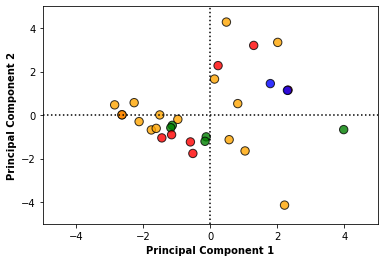

In [39]:
labels = {'active_both': 'green', 'active_glucosidase': 'blue', 'active_amylase': 'red', 'inactive': 'orange'}
label_color = [labels[l] for l in df_pca_PC_class['Bioactivity_class']]
legends = ['active_both', 'active_glucosidase', 'active_amylase', 'inactive']

plt.scatter(df_pca_PC_class['PC1'], df_pca_PC_class['PC2'], color=label_color,s=70, alpha=0.8, edgecolors='black')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('Principal Component 1', weight='bold')
plt.ylabel('Principal Component 2', weight='bold')
plt.show()

# KMean 

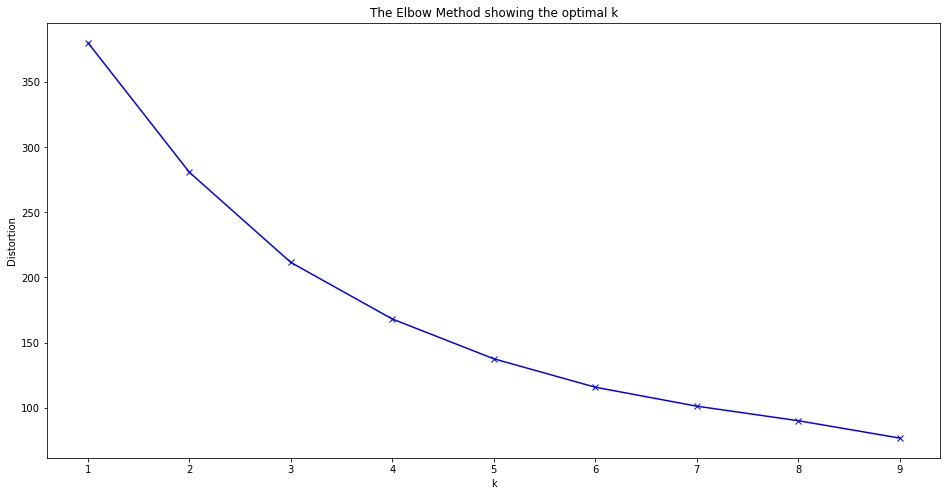

In [40]:
from sklearn.cluster import KMeans
wcss=[]
K = range(1,10)
for i in K: 
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [77]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4, random_state=42)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_pca_PC)
 
print(label)

[1 2 1 3 0 2 1 0 2 0 1 3 1 1 1 3 1 1 1 2 2 1 1 2 0 1 1 1 0 1 2]


In [78]:
len(label)

31

In [79]:
#Getting unique labels
 
filtered_label0 = df_pca_PC[label == 0]
filtered_label1 = df_pca_PC[label == 1]
filtered_label2 = df_pca_PC[label == 2]
filtered_label3 = df_pca_PC[label == 3]

In [62]:
print(len(filtered_label0))
print(len(filtered_label1))
print(len(filtered_label2))
print(len(filtered_label3))

5
16
7
3


In [80]:
centroids = kmeans.cluster_centers_


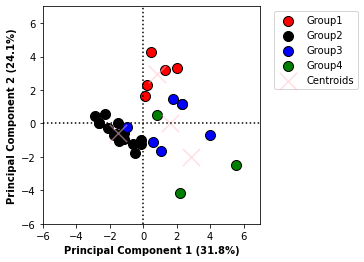

In [81]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
plt.scatter(filtered_label0['PC1'] , filtered_label0['PC2'] , color = 'red', label='Group1', s=100, alpha=1, edgecolor='black')
plt.scatter(filtered_label1['PC1'] , filtered_label1['PC2'] , color = 'black', label='Group2', s=100, alpha=1, edgecolor='black')
plt.scatter(filtered_label2['PC1'] , filtered_label2['PC2'] , color = 'blue', label='Group3', s=100, alpha=1, edgecolor='black')
plt.scatter(filtered_label3['PC1'] , filtered_label3['PC2'] , color = 'green', label='Group4', s=100, alpha=1, edgecolor='black')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 300, color = 'pink', alpha=0.5, marker = 'x', label='Centroids')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.axvline(0, c='black', ls=':')
plt.axhline(0, c='black', ls=':')
plt.xlim(-6,7)
plt.ylim(-6,7)
plt.xlabel('Principal Component 1 (31.8%)', weight='bold')
plt.ylabel('Principal Component 2 (24.1%)', weight='bold')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
ax.set_aspect('equal', adjustable='box')
plt.savefig('Kmean_1-3_with_label.pdf', dpi=500, bbox_inches='tight')
plt.show()

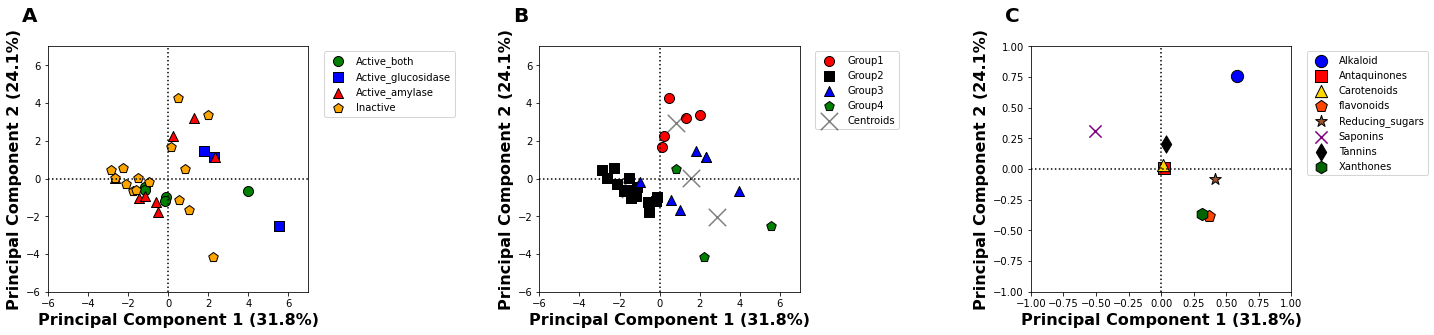

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
fig.tight_layout(w_pad=20)
texts = ['A', 'B', 'C']
axes = fig.get_axes()
for a,l in zip(axes, texts):
    a.annotate(l, xy=(-0.1, 1.1), xycoords="axes fraction", fontsize=20, weight = 'bold')

ax[0].axvline(0, c='black', ls=':')
ax[0].axhline(0, c='black', ls=':')
ax[0].set_xlim(-6,7)
ax[0].set_ylim(-6,7)
ax[0].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=16)
ax[0].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[0].scatter(label1['PC1'] , label1['PC2'] , color = 'green', label='Active_both',s=100, alpha=1, edgecolor='black', marker='o')
ax[0].scatter(label2['PC1'] , label2['PC2'] , color = 'blue', label='Active_glucosidase',s=100, alpha=1, edgecolor='black', marker='s')
ax[0].scatter(label3['PC1'] , label3['PC2'] , color = 'red', label='Active_amylase',s=100, alpha=1, edgecolor='black', marker='^')
ax[0].scatter(label4['PC1'] , label4['PC2'] , color = 'orange', label='Inactive',s=100, alpha=1, edgecolor='black', marker='p')
ax[0].legend(bbox_to_anchor=(1.04,1), loc='upper left')
#for i in range(len(x)):
    #ax[0].annotate(df_re_label.index[i], (df_pca_PC['PC1'][i], df_pca_PC['PC2'][i] + 0.2))


ax[1].scatter(filtered_label0['PC1'] , filtered_label0['PC2'] , color = 'red', label='Group1', s=100, alpha=1, edgecolor='black', marker='o')
ax[1].scatter(filtered_label1['PC1'] , filtered_label1['PC2'] , color = 'black', label='Group2', s=100, alpha=1, edgecolor='black', marker='s')
ax[1].scatter(filtered_label2['PC1'] , filtered_label2['PC2'] , color = 'blue', label='Group3', s=100, alpha=1, edgecolor='black', marker='^')
ax[1].scatter(filtered_label3['PC1'] , filtered_label3['PC2'] , color = 'green', label='Group4', s=100, alpha=1, edgecolor='black', marker='p')
ax[1].scatter(centroids[:,0] , centroids[:,1] , s = 300, color = 'black', alpha=0.5, marker = 'x', label='Centroids')
# Loop for annotation of all points
#for i in range(len(x)):
    #ax[1].annotate(df_pca_PC.index[i], (df_pca_PC['PC1'][i], df_pca_PC['PC2'][i] + 0.2))
ax[1].axvline(0, c='black', ls=':')
ax[1].axhline(0, c='black', ls=':')
ax[1].set_xlim(-6,7)
ax[1].set_ylim(-6,7)
ax[1].set_xlabel('Principal Component 1 (31.8%)', weight='bold', fontsize=16)
ax[1].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[1].legend(bbox_to_anchor=(1.04,1), loc='upper left')

ax[2].set_xlabel('Principal Component 1 (31.8%)', weight='bold' , fontsize=16)
ax[2].set_ylabel('Principal Component 2 (24.1%)', weight='bold', fontsize=16)
ax[2].axvline(0, c='black', ls=':')
ax[2].axhline(0, c='black', ls=':')
ax[2].set_xlim(-1,1)
ax[2].set_ylim(-1,1)
ax[2].scatter(loading1['PC1'] , loading1['PC2'] , color = 'blue', label='Alkaloid',s=150, alpha=1, marker='o', edgecolor='black')
ax[2].scatter(loading2['PC1'] , loading2['PC2'] , color = 'red', label='Antaquinones',s=150, alpha=1, marker='s', edgecolor='black')
ax[2].scatter(loading3['PC1'] , loading3['PC2'] , color = 'gold', label='Carotenoids',s=150, alpha=1, marker='^', edgecolor='black')
ax[2].scatter(loading4['PC1'] , loading4['PC2'] , color = 'orangered', label='flavonoids',s=150, alpha=1, marker='p', edgecolor='black')
ax[2].scatter(loading5['PC1'] , loading5['PC2'] , color = 'sienna', label='Reducing_sugars',s=150, alpha=1, marker='*', edgecolor='black')
ax[2].scatter(loading6['PC1'] , loading6['PC2'] , color = 'purple', label='Saponins',s=150, alpha=1, marker='x', edgecolor='black')
ax[2].scatter(loading7['PC1'] , loading7['PC2'] , color = 'black', label='Tannins',s=150, alpha=1, marker='d', edgecolor='black')
ax[2].scatter(loading8['PC1'] , loading8['PC2'] , color = 'darkgreen', label='Xanthones',s=150, alpha=1, marker='h', edgecolor='black')
ax[2].legend(bbox_to_anchor=(1.04,1), loc='upper left')
#Loop for annotation of all points
#for i in range(len(df_pca_loading)):
    #ax[2].annotate(df_pca_loading.index[i], (df_pca_loading['PC1'][i], df_pca_loading['PC2'][i] -0.2 ), fontsize=12)

plt.savefig('Kmean_vs_PCA.pdf', dpi=500, bbox_inches='tight')
plt.show()

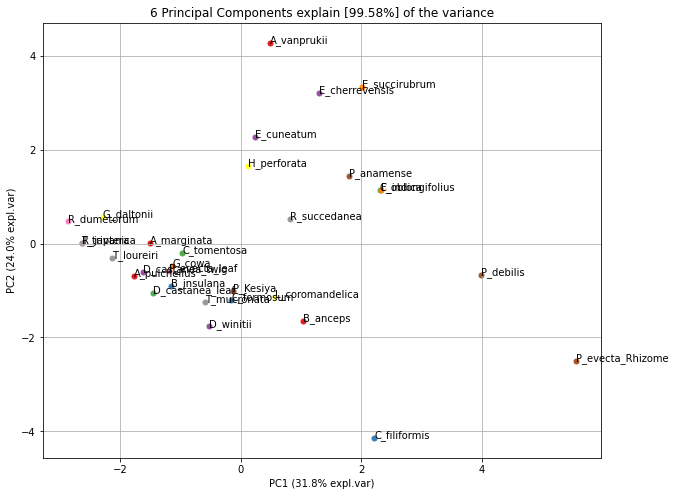

In [34]:
fig, ax = model.scatter(legend=False)

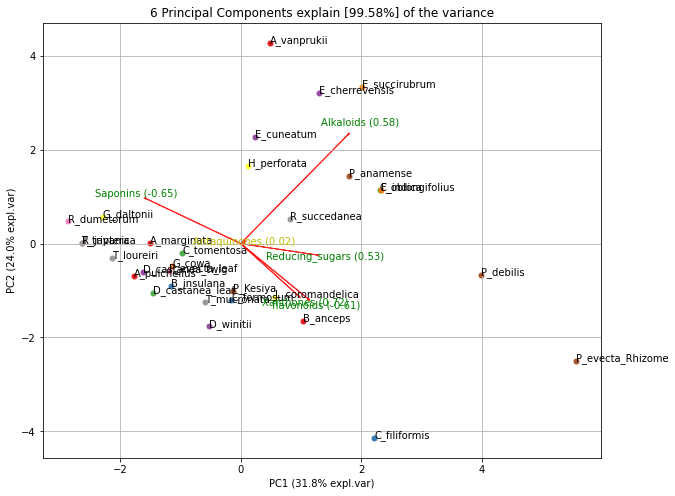

In [42]:
fig, ax = model.biplot(n_feat=6, legend=False)

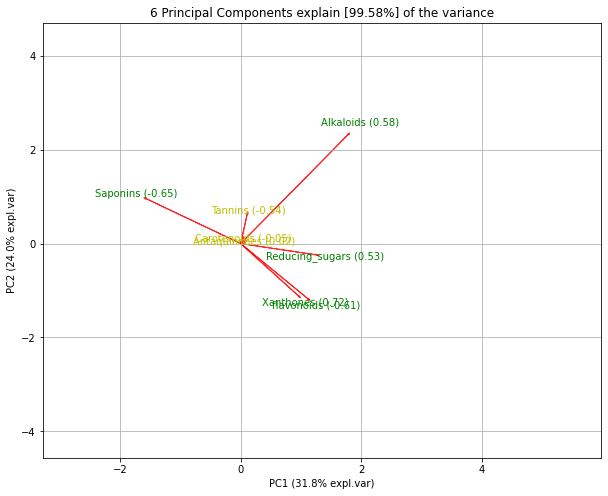

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [99.58%] of the variance'}, xlabel='PC1 (31.8% expl.var)', ylabel='PC2 (24.0% expl.var)'>)

In [62]:
model.biplot(cmap=None, label=False, legend=False)

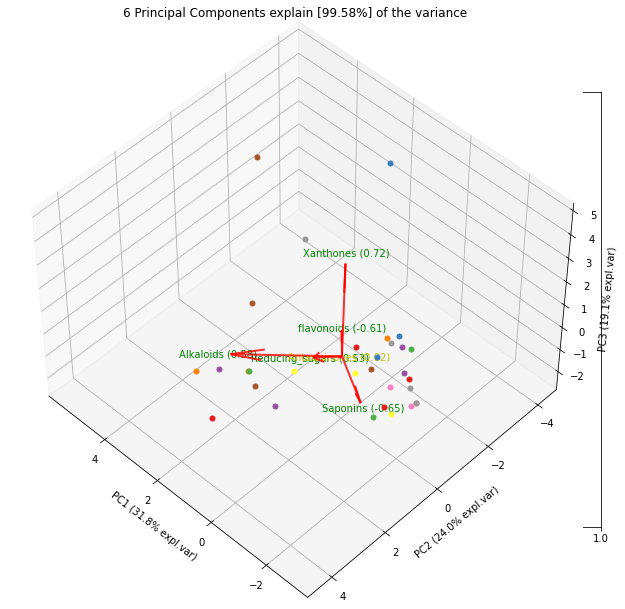

In [45]:
ax = model.biplot3d(n_feat=6, legend=False)

In [46]:
print(results['topfeat'])

    PC          feature   loading  type
0  PC1        Alkaloids  0.580337  best
1  PC2        Alkaloids  0.756010  best
2  PC3        Xanthones  0.721191  best
3  PC4         Saponins -0.649448  best
4  PC5  Reducing_sugars  0.533463  best
5  PC6       flavonoids -0.606294  best
6  PC5     Antaquinones  0.024059  weak
7  PC5      Carotenoids -0.051457  weak
8  PC6          Tannins -0.543203  weak


# Post PCA run RF

In [47]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'], index=indices)

In [48]:
principalDf 

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
Name_Short,,,,,,
G_cowa,-1.137123,-0.471515,1.402216,2.333299,1.357207,0.586112
P_debilis,3.983072,-0.668152,-1.706242,-0.865596,-1.605007,0.712830
P_evecta_leaf,-1.180942,-0.583496,-0.853201,0.396442,-0.063465,-1.181858
P_evecta_Rhizome,5.553863,-2.494154,1.899712,-0.839114,0.751199,-0.080271
E_cuneatum,0.230586,2.275222,-0.272833,0.988605,0.264548,-1.350849
P_anamense,1.791691,1.447887,-1.589100,-0.888612,1.086445,0.040024
A_marginata,-1.510425,0.007190,-0.913622,1.359107,0.715027,-1.118767
E_cherrevensis,1.295097,3.204121,1.245042,-0.889576,-1.566359,0.131278
F_indica,2.321658,1.148881,-1.691600,-0.244665,0.732347,0.324237


In [49]:
#train test
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(principalDf, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 24
Test data size: 7


In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)

CV_score = [0.66666667 0.         0.66666667 0.         0.5        1.
 0.         0.5        0.5        0.        ]
CV_mean = 0.3833333333333333
CV_sd = 0.3419714088113865
accuracy score = 0.2857142857142857


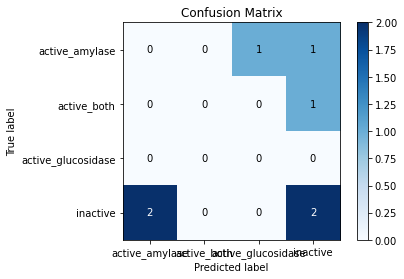

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplot

model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(train_x, train_y)
scores=cross_val_score(model_RF, train_x, train_y, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(f'CV_score = {scores}')
print(f'CV_mean = {avg_score}')
print(f'CV_sd = {sd_score}')
y_pred = model_RF.predict(test_x)
y_pred
accuracy_score = accuracy_score(test_y, y_pred, normalize=True)
print(f'accuracy score = {accuracy_score}')
skplot.metrics.plot_confusion_matrix(test_y, y_pred)
plt.show()

doesn't work